In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'INR'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'cf93e1c1-ba8d-4d13-bcd8-010aedcb345f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-30T07:23:30.833Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 9882}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11793, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [12]:
import pandas as pd
pd.set_option('display.max.columns', None)
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.INR.price,quote.INR.volume_24h,quote.INR.volume_change_24h,quote.INR.percent_change_1h,quote.INR.percent_change_24h,quote.INR.percent_change_7d,quote.INR.percent_change_30d,quote.INR.percent_change_60d,quote.INR.percent_change_90d,quote.INR.market_cap,quote.INR.market_cap_dominance,quote.INR.fully_diluted_market_cap,quote.INR.tvl,quote.INR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11793,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977512e+07,1.977512e+07,False,NaN,1,NaN,NaN,None,2024-10-30T07:21:00.000Z,6.085452e+06,4.427987e+12,11.2456,-0.055255,2.004237,8.144731,11.984722,22.427271,12.420372,1.203405e+14,58.6940,1.277945e+14,None,2024-10-30T07:21:05.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 12:53:44.248002
1,1027,Ethereum,ETH,ethereum,9467,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204063e+08,1.204063e+08,True,NaN,2,NaN,NaN,None,2024-10-30T07:21:00.000Z,2.242322e+05,1.743725e+12,-4.5266,-0.293665,2.085229,2.149951,1.013873,5.771488,-15.949435,2.699896e+13,13.1683,2.699896e+13,None,2024-10-30T07:21:05.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 12:53:44.248002
2,825,Tether USDt,USDT,tether,101919,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.205041e+11,1.223379e+11,True,NaN,3,NaN,NaN,None,2024-10-30T07:21:00.000Z,8.405493e+01,6.708727e+12,1.7553,0.001040,0.053202,0.040233,-0.051622,-0.031102,-0.001253,1.012897e+13,4.9379,1.028311e+13,None,2024-10-30T07:21:05.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-30 12:53:44.248002
3,1839,BNB,BNB,bnb,2273,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459310e+08,1.459310e+08,False,NaN,4,NaN,NaN,None,2024-10-30T07:22:00.000Z,5.063830e+04,1.527478e+11,1.7891,-0.471928,-0.333261,2.647871,3.352079,12.308528,5.729406,7.389695e+12,3.6025,7.389695e+12,None,2024-10-30T07:21:05.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 12:53:44.248002
4,5426,Solana,SOL,solana,775,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.702661e+08,5.873818e+08,True,NaN,5,NaN,NaN,None,2024-10-30T07:22:00.000Z,1.501235e+04,2.790288e+11,-18.5268,-0.721390,-0.589149,8.046144,13.286405,29.471914,5.648938,7.059798e+12,3.4417,8.817979e+12,None,2024-10-30T07:21:05.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 12:53:44.248002
5,3408,USDC,USDC,usd-coin,22735,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.486927e+10,3.486927e+10,False,NaN,6,NaN,NaN,None,2024-10-30T07:21:00.000Z,8.407360e+01,7.411978e+11,1.9344,-0.001952,-0.003594,0.005212,-0.014641,-0.011734,-0.022176,2.931585e+12,1.4298,2.931585e+12,None,2024-10-30T07:21:05.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-30 12:53:44.248002
6,52,XRP,XRP,xrp,1413,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.681186e+10,9.998707e+10,False,NaN,7,NaN,NaN,None,2024-10-30T07:21:00.000Z,4.402823e+01,8.601858e+10,6.4504,-0.356192,-0.201192,-0.901887,-18.876479,-7.733178,-14.111904,2.501325e+12,1.2196,4.402823e+12,None,2024-10-30T07:21:05.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 12:53:44.248002
7,74,Dogecoin,DOGE,dogecoin,1090,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.465791e+11,1.465791e+11,True,NaN,8,NaN,NaN,None,2024-10-30T07:20:00.000Z,1.462682e+01,2.768177e+11,-12.2869,-1.118720,6.217086,24.280629,41.385837,71.727451,44.217369,2.143985e+12,1.0455,2.143985e+12,None,2024-10-30T07:21:05.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 12:53:44.248002
8,1958,TRON,TRX,tron,1059,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",N

In [2]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os
from time import time
from time import sleep
pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', None)

In [3]:
all_data = []
def api_runner():
    global df
    url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"


    parameters = {
        "start": "1", 
        "limit": "15", 
        "convert": "INR"
    }
    headers = {
        "Accepts": "application/json",
        "X-CMC_PRO_API_KEY": "cf93e1c1-ba8d-4d13-bcd8-010aedcb345f",
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    #all_data.append(df)
    #df = pd.concat(all_data, ignore_index= True)

    if not os.path.isfile(r'F:\Practice\Data Analytics\PYTHON for Data Analytics\23.API.csv'):
        df.to_csv(r'F:\Practice\Data Analytics\PYTHON for Data Analytics\23.API.csv', header='column_names', index = False)
    else:
        df.to_csv(r'F:\Practice\Data Analytics\PYTHON for Data Analytics\23.API.csv', mode='a',header=False, index=False)


In [42]:

for limit in range(300):
    api_runner()
    print('Completed')
    sleep(60)
exit()

Completed
Completed


KeyboardInterrupt: 

In [4]:
new_df = pd.read_csv(r'F:\Practice\Data Analytics\PYTHON for Data Analytics\23.API.csv')
new_df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.INR.price,quote.INR.volume_24h,quote.INR.volume_change_24h,quote.INR.percent_change_1h,quote.INR.percent_change_24h,quote.INR.percent_change_7d,quote.INR.percent_change_30d,quote.INR.percent_change_60d,quote.INR.percent_change_90d,quote.INR.market_cap,quote.INR.market_cap_dominance,quote.INR.fully_diluted_market_cap,quote.INR.tvl,quote.INR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11793,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.977521e+07,1.977521e+07,False,NaN,1,NaN,NaN,NaN,2024-10-30T09:45:00.000Z,6.086820e+06,4.425316e+12,10.3207,0.018216,1.698236,8.955713,13.397638,22.872805,12.239588,1.203681e+14,58.6790,1.278232e+14,NaN,2024-10-30T09:45:59.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 15:17:28.520713
1,1027,Ethereum,ETH,ethereum,9468,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204063e+08,1.204063e+08,True,NaN,2,NaN,NaN,NaN,2024-10-30T09:45:00.000Z,2.250897e+05,1.780663e+12,-2.3541,0.402640,2.056765,3.860386,2.037960,6.464016,-15.876655,2.710221e+13,13.2094,2.710221e+13,NaN,2024-10-30T09:45:59.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 15:17:28.520713
2,825,Tether USDt,USDT,tether,101955,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.205041e+11,1.223379e+11,True,NaN,3,NaN,NaN,NaN,2024-10-30T09:45:00.000Z,8.405947e+01,6.722413e+12,1.7316,0.008202,0.052254,0.055433,-0.019528,-0.046939,0.026591,1.012951e+13,4.9370,1.028366e+13,NaN,2024-10-30T09:45:59.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-30 15:17:28.520713
3,1839,BNB,BNB,bnb,2273,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459310e+08,1.459310e+08,False,NaN,4,NaN,NaN,NaN,2024-10-30T09:45:00.000Z,5.061611e+04,1.528135e+11,1.8163,-0.285775,-0.678455,3.428183,4.290411,12.507213,5.460498,7.386457e+12,3.6001,7.386457e+12,NaN,2024-10-30T09:45:59.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 15:17:28.520713
4,5426,Solana,SOL,solana,775,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.703838e+08,5.875400e+08,True,NaN,5,NaN,NaN,NaN,2024-10-30T09:45:00.000Z,1.497143e+04,2.807980e+11,-16.5697,-0.218887,-1.568970,7.517729,14.364580,30.537246,5.478095,7.042318e+12,3.4322,8.796314e+12,NaN,2024-10-30T09:45:59.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 15:17:28.520713
5,3408,USDC,USDC,usd-coin,22738,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.487759e+10,3.487759e+10,False,NaN,6,NaN,NaN,NaN,2024-10-30T09:45:00.000Z,8.407384e+01,7.445449e+11,3.1954,0.004985,-0.008175,0.009958,0.004241,-0.037013,-0.009390,2.932293e+12,1.4291,2.932293e+12,NaN,2024-10-30T09:45:59.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-30 15:17:28.520713
6,52,XRP,XRP,xrp,1413,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.681186e+10,9.998707e+10,False,NaN,7,NaN,NaN,NaN,2024-10-30T09:45:00.000Z,4.413545e+01,8.476836e+10,1.4685,0.196310,0.316847,-0.130706,-18.730295,-7.327415,-13.438107,2.507417e+12,1.2220,4.413545e+12,NaN,2024-10-30T09:45:59.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 15:17:28.520713
7,74,Dogecoin,DOGE,dogecoin,1090,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.465806e+11,1.465806e+11,True,NaN,8,NaN,NaN,NaN,2024-10-30T09:45:00.000Z,1.437466e+01,2.829758e+11,-11.1021,-1.051819,3.941674,24.583975,40.815683,69.843868,41.237269,2.107046e+12,1.0272,2.107046e+12,NaN,2024-10-30T09:45:59.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-30 15:17:28.520713
8,1958,TRON,TRX,tron,1059,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,8.647167e+10,8.64717

In [5]:
df1 = new_df.groupby('name', sort=False)[['quote.INR.percent_change_1h', 'quote.INR.percent_change_24h', 'quote.INR.percent_change_7d', 'quote.INR.percent_change_30d', 'quote.INR.percent_change_60d', 'quote.INR.percent_change_90d']].mean(numeric_only=True)

In [61]:
df1.transpose()

name,Bitcoin,Ethereum,Tether USDt,BNB,Solana,USDC,XRP,Dogecoin,TRON,Toncoin,Cardano,Shiba Inu,Avalanche,Chainlink,Bitcoin Cash
quote.INR.percent_change_1h,0.009786,0.421809,-0.000989,-0.320181,-0.288644,-0.006613,0.178229,-1.082765,-0.041755,0.395569,-0.458588,-0.361468,-0.038786,0.169710,-0.164630
quote.INR.percent_change_24h,1.691573,2.061683,0.041354,-0.734716,-1.654219,-0.020382,0.270701,3.861223,2.264362,0.623574,2.746355,1.154521,-0.747251,3.835126,-2.589217
quote.INR.percent_change_7d,8.945540,3.862046,0.048409,3.382091,7.419257,-0.000413,-0.157223,24.481170,4.918803,-2.066559,-0.760393,4.843801,-1.550041,4.515963,6.146482
quote.INR.percent_change_30d,13.371827,2.036494,-0.027806,4.259063,14.220562,-0.004824,-18.644838,40.657605,8.068309,-12.888820,-8.027520,0.697485,-7.612600,-1.868662,7.683293
quote.INR.percent_change_60d,22.863873,6.467585,-0.053795,12.476229,30.429805,-0.041197,-7.349227,69.768802,6.894259,-4.980719,2.894499,34.444298,15.404690,7.881932,15.690685
quote.INR.percent_change_90d,12.251494,-15.853376,0.019566,5.420843,5.422617,-0.022059,-13.439422,41.187470,29.908090,-25.657276,-7.906159,17.006827,3.822304,-7.808410,-10.312464


In [30]:
df2 = df1.stack().to_frame(name='values').reset_index()

In [31]:
df2 = df2.rename(columns={'level_1':'percentage_change'})

In [33]:
df2['percentage_change'] = df2['percentage_change'].replace(['quote.INR.percent_change_1h'],['1h'])
df2['percentage_change'] = df2['percentage_change'].replace(
    ['quote.INR.percent_change_24h',
     'quote.INR.percent_change_7d',
     'quote.INR.percent_change_30d',
     'quote.INR.percent_change_60d',
     'quote.INR.percent_change_90d'],
     ['24h','7d','30d','60d','90d']
    )
df2


,name,percentage_change,values
0,Bitcoin,1h,0.009786
1,Bitcoin,24h,1.691573
2,Bitcoin,7d,8.945540
3,Bitcoin,30d,13.371827
4,Bitcoin,60d,22.863873
5,Bitcoin,90d,12.251494
6,Ethereum,1h,0.421809
7,Ethereum,24h,2.061683
8,Ethereum,7d,3.862046
9,Ethereum,30d,2.036494


In [11]:
import seaborn as sns
import matplotlib as plt

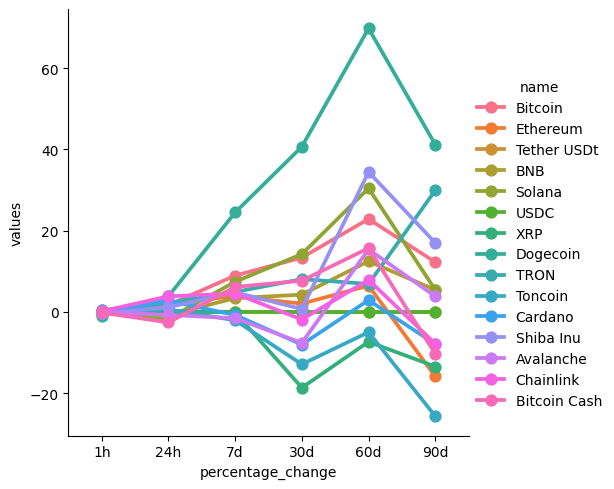

In [34]:
sns.catplot(x='percentage_change', y='values', data=df2, hue='name', kind='point')